Identifying the handwritten digits using NNs (Using dataset from Keras)

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# We get higher accuracy when the values are between 0 to 1 or -1 to 1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

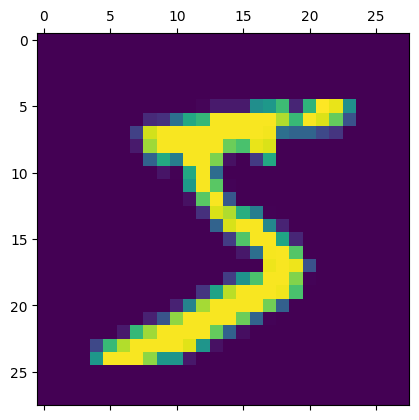

In [10]:
plt.matshow(X_train[0])

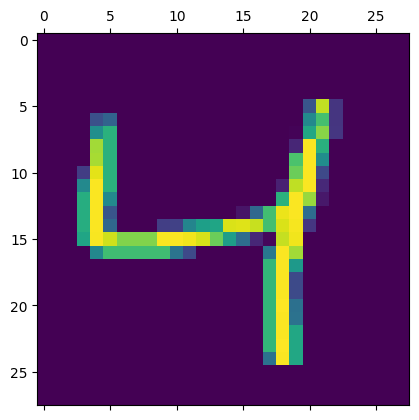

In [11]:
plt.matshow(X_train[2])

In [12]:
#Check the correctness of train and test data
y_train[2]

4

Flatten the training dataset, as we need have to pass 1D array to the input layer

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
# reshape() function is being used to convert the 2D array into a 1D array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [15]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

Create the model

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,), activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4784 - accuracy: 0.8729
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3050 - accuracy: 0.9149
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2842 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2623 - accuracy: 0.9266
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2580 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

Evaluate

In [17]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9270


[0.2669481337070465, 0.9269999861717224]

Predict

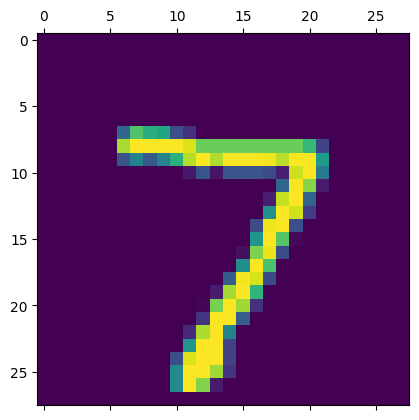

In [18]:
plt.matshow(X_test[0])

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([4.5076972e-03, 2.6221352e-08, 1.8620687e-02, 9.7193623e-01,
       1.7846226e-03, 1.3892300e-01, 1.1359878e-07, 9.9980652e-01,
       8.2601376e-02, 6.6630614e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[0])

7

In [21]:
# Checking the actual values vs predicted values

# Since the final output contains scores for all 10 digits, we have to extract the digit corresponding to the maximum score
y_predicted_lables = [np.argmax(i) for i in y_predicted]
print(y_test[:5])
print(y_predicted_lables[:5])

[7 2 1 0 4]
[7, 2, 1, 0, 4]


In [22]:
# Confusion matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    2,    2,    0,    4,   15,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,    8,  941,   13,    8,    3,   14,    8,   29,    4],
       [   3,    0,   23,  920,    0,   19,    5,    9,   21,   10],
       [   1,    2,    6,    1,  906,    0,   13,    4,    9,   40],
       [   9,    4,    2,   40,   11,  758,   24,    7,   31,    6],
       [   6,    3,    8,    1,    7,    7,  925,    1,    0,    0],
       [   1,    7,   26,    2,    9,    1,    0,  942,    1,   39],
       [   6,   13,    8,   19,    8,   17,   12,   10,  870,   11],
       [  10,    8,    2,    8,   22,    4,    0,   12,    6,  937]])>

Text(95.72222222222221, 0.5, 'Truth')

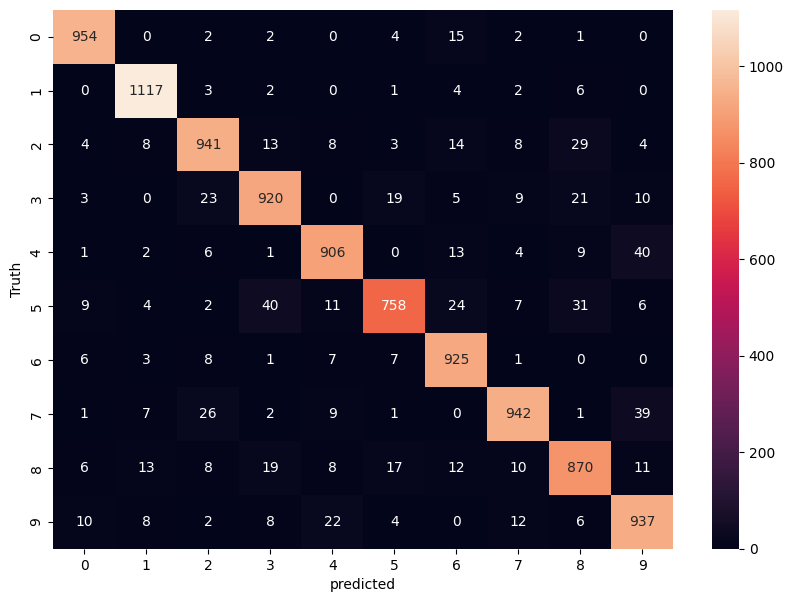

In [23]:
import seaborn as sn
plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("Truth")

Let's add hidden layers and check if the performance increases

In [26]:
model = keras.Sequential([

    # keras comes with a built in flatten array function
    # keras.layers.Flatten(input_shape=(28,28)),

    # we are randomly cloosing number of nodes/ neurons in our hidden layer as 100
    # Always use relu as activation fn for hidden layers
    keras.layers.Dense(100, input_shape= (784,), activation="relu"),

    # last layer do not need input shape as it takes the input from the previous layer
    keras.layers.Dense(10, activation="sigmoid")
])

# code to log the epoch
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq=1)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=10, callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2804 - accuracy: 0.9213
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1257 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0891 - accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0667 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0546 - accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0432 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0361 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0305 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0245 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.02

Accuracy is increased from 82% to 92%

In [27]:
# Launching Tensor Board

%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13780), started 0:17:09 ago. (Use '!kill 13780' to kill it.)